## IMPORT THƯ VIỆN

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

## LOAD DATA

In [13]:
jobs_df = pd.read_csv('../processed/job_descriptions_parsed.csv')
cvs_df = pd.read_csv('../processed/cv_features_parsed.csv')
training_df = pd.read_csv('../processed/training_data.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nNumber of Job Descriptions: {len(jobs_df)}")
print(f"Number of CVs: {len(cvs_df)}")
print(f"Number of Training Pairs: {len(training_df)}")
print(f"\nAverage CVs per Job: {len(training_df) / len(jobs_df):.1f}")

DATASET OVERVIEW

Number of Job Descriptions: 853
Number of CVs: 2484
Number of Training Pairs: 42650

Average CVs per Job: 50.0


## JOB DESCRIPTIONS ANALYSIS


Missing Values in Jobs:
company_name            0
position_title          0
skills                  0
min_experience         12
education             411
seniority             132
description_length      0
skills_count            0
dtype: int64

Experience Requirements Distribution:
min_experience
0.0      52
1.0     215
2.0      42
3.0      83
5.0     283
8.0     151
12.0     15
Name: count, dtype: int64


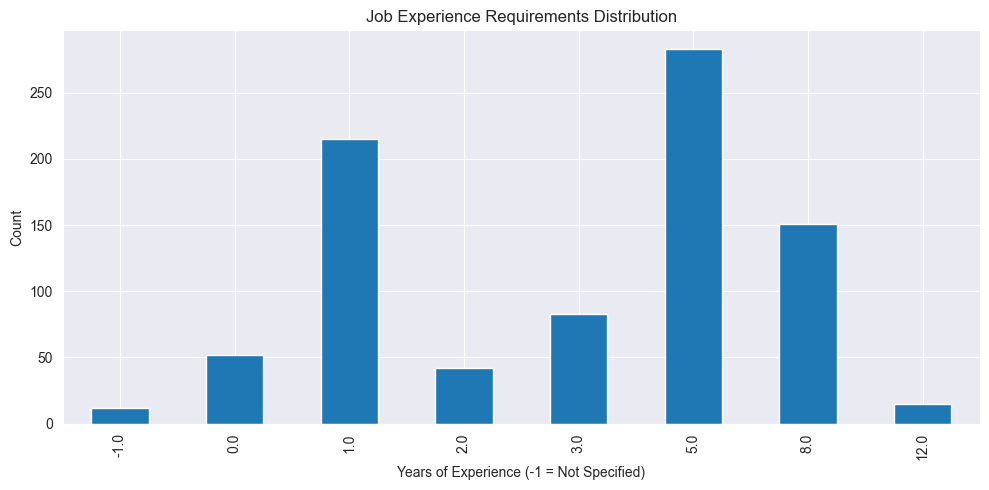


Education Requirements Distribution:
education
bachelor         213
master           123
high school       89
phd               14
undergraduate      3
Name: count, dtype: int64


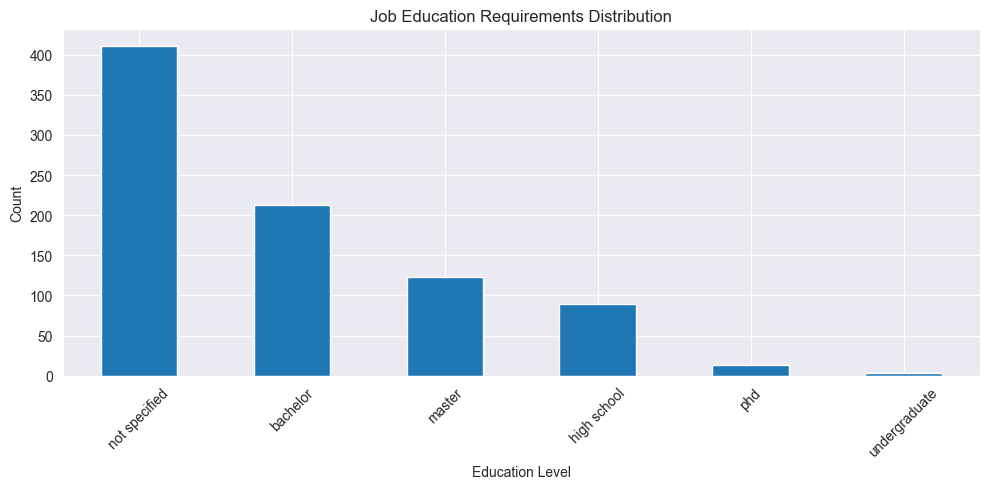


Seniority Distribution:
seniority
senior       282
junior       172
manager      151
mid           72
intern        29
executive     15
Name: count, dtype: int64


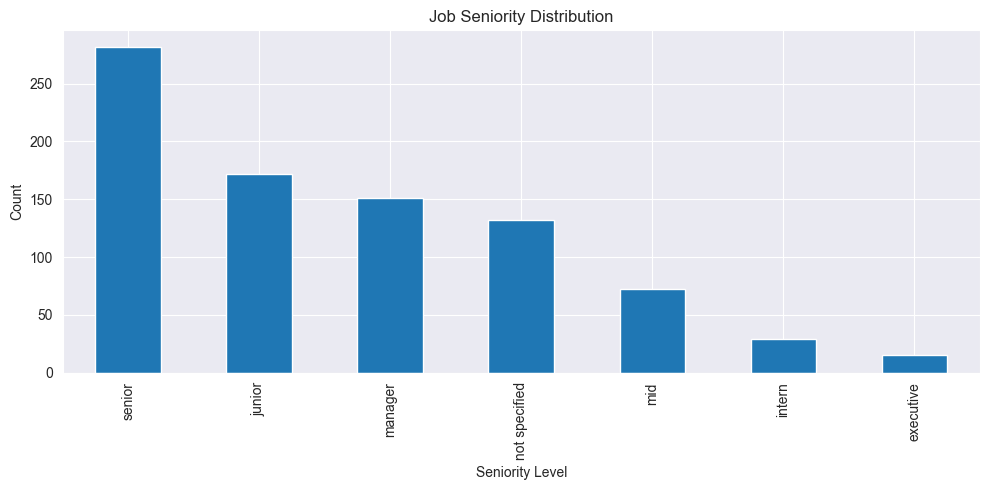


Top 20 Job Skills:
  go: 588
  communication: 552
  leadership: 427
  excel: 416
  time management: 399
  creativity: 276
  medical: 267
  teamwork: 254
  critical thinking: 245
  adaptability: 234
  rest: 223
  git: 148
  api: 136
  problem solving: 134
  aws: 119
  attention to detail: 118
  sem: 117
  rust: 102
  social media: 62
  clinical: 57


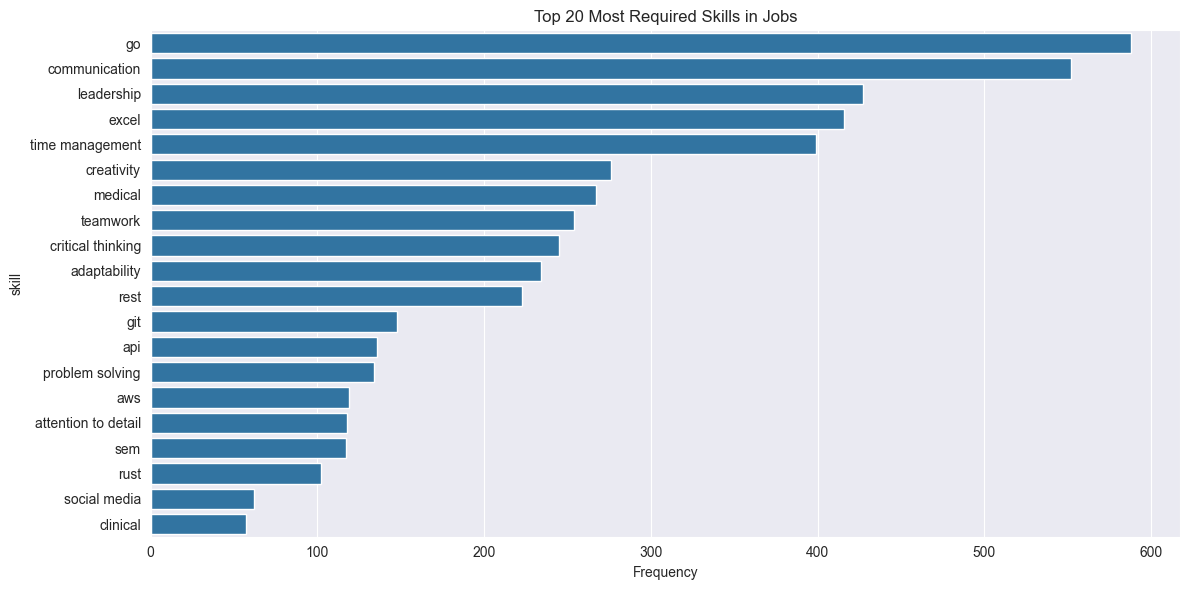

In [14]:
# 2.1 Khảo sát các dữ liệu thiếu
print("\nMissing Values in Jobs:")
print(jobs_df.isnull().sum())

# 2.2 Thống kê yêu cầu số năm kinh nghiệm trong JD
print("\nExperience Requirements Distribution:")
exp_dist = jobs_df['min_experience'].value_counts().sort_index()
print(exp_dist)

plt.figure(figsize=(10, 5))
jobs_df['min_experience'].fillna(-1).value_counts().sort_index().plot(kind='bar')
plt.title('Job Experience Requirements Distribution')
plt.xlabel('Years of Experience (-1 = Not Specified)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.3 Education distribution
print("\nEducation Requirements Distribution:")
edu_dist = jobs_df['education'].value_counts()
print(edu_dist)

plt.figure(figsize=(10, 5))
jobs_df['education'].fillna('not specified').value_counts().plot(kind='bar')
plt.title('Job Education Requirements Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.4 Seniority distribution
print("\nSeniority Distribution:")
seniority_dist = jobs_df['seniority'].value_counts()
print(seniority_dist)

plt.figure(figsize=(10, 5))
jobs_df['seniority'].fillna('not specified').value_counts().plot(kind='bar')
plt.title('Job Seniority Distribution')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.5 Skills analysis
all_job_skills = []
for skills_json in jobs_df['skills'].dropna():
    try:
        skills = json.loads(skills_json)
        all_job_skills.extend(skills)
    except:
        continue

skill_counter = Counter(all_job_skills)
top_20_skills = skill_counter.most_common(20)

print("\nTop 20 Job Skills:")
for skill, count in top_20_skills:
    print(f"  {skill}: {count}")

plt.figure(figsize=(12, 6))
skills_df = pd.DataFrame(top_20_skills, columns=['skill', 'count'])
sns.barplot(data=skills_df, x='count', y='skill')
plt.title('Top 20 Most Required Skills in Jobs')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()